<a href="https://colab.research.google.com/github/serajelsuwidi/Apriori-25-11/blob/main/apriori10_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# استدعاء المكاتب اللازمة
import pandas as pd
from collections import defaultdict
from itertools import combinations
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from mlxtend.frequent_patterns import apriori, association_rules

import seaborn as sns



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# تحميل البيانات
x_train_file_path = '/content/drive/MyDrive/data/x_train.csv'
# x_train = pd.read_csv(x_train_file_path)  # ميزات التدريب

# file_path = '/content/drive/MyDrive/data/y_train.csv'
# y_train = pd.read_csv(file_path)  # تسميات التدريب

# file_path = '/content/drive/MyDrive/data/x_test.csv'
# x_test = pd.read_csv(file_path)    # ميزات الاختبار

# file_path = '/content/drive/MyDrive/data/y_test.csv'
# y_test = pd.read_csv(file_path)    # تسميات الاختبار

# file_path = '/content/drive/MyDrive/data/total.csv'
# total = pd.read_csv(file_path)       # مجموعة البيانات الكاملة

# file_path = '/content/drive/MyDrive/data/norm.csv'
# norm = pd.read_csv(file_path)         # البيانات الطبيعية

# file_path = '/content/drive/MyDrive/data/anom.csv'
# anom = pd.read_csv(file_path)         # البيانات غير الطبيعية

#طباعة بيانات
#print(x_train.info())
#print("************#################***************")
#print(x_test.info())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#كلاس مخصص لتحميل وتحويل المعاملات من الصفوف الموجودة في ملف قاعدة البيانات
class Transactions:
    def __init__(self):
        self.Transactions = []

    def load_transactions(self, file_path):
        df = pd.read_csv(file_path)
        for index, row in df.iterrows():
            try:
                temp = frozenset(map(lambda x: int(float(x)), row.astype(str).values))
                self.Transactions.append(temp)
            except ValueError as e:
                print(f"Error processing row {index}: {e}")

        # طباعة المعاملات المحملة
        print("تم تحميل المعاملات:")
        for transaction in self.Transactions:
            print(transaction)

# هنا تقوم بإنشاء كائن من الفئة
transactions_object = Transactions()

# هنا تستدعي الدالة مع المسار
transactions_object.load_transactions(x_train_file_path)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
frozenset({0, 1, 2, 5, 8, 51, 52, 57, 61})
frozenset({0, 1, 5, 38, 8, 13, 240, 49, 178})
frozenset({0, 33, 2, 1, 5, 8, 48, 31})
frozenset({0, 1, 5, 9, 52})
frozenset({0, 2, 259, 5, 38, 8, 13, 50, 182, 247})
frozenset({0, 1, 34, 32, 5, 8, 48})
frozenset({0, 1, 4, 8, 52})
frozenset({0, 1, 2, 5, 11, 61})
frozenset({0, 1, 160, 5, 38, 8, 13, 49, 221})
frozenset({0, 2, 5, 262, 8, 41, 13, 50, 183, 250})
frozenset({0, 1, 5, 70, 8, 9, 48, 50})
frozenset({0, 1, 34, 32, 5, 8, 48})
frozenset({0, 1, 5, 8, 49})
frozenset({0, 1, 5, 70, 8, 9, 48, 50})
frozenset({0, 2, 36, 5, 263, 8, 13, 49, 251, 189})
frozenset({0, 1, 5, 8, 47})
frozenset({0, 1, 5, 7, 8, 47, 48, 63})
frozenset({0, 1, 2, 4, 9, 42})
frozenset({0, 1, 5, 9, 51})
frozenset({0, 1, 5, 8, 48})
frozenset({0, 1, 5, 8, 50})
frozenset({0, 1, 2, 5, 8, 17, 24, 57})
frozenset({0, 1, 2, 4, 5, 8, 57})
frozenset({0, 2, 5, 8, 40, 13, 175, 241, 50, 253})
frozenset({0, 33, 2, 1, 5, 8, 48, 31})
frozenset({

In [22]:
# تعريف فئة Apriori
class Apriori:
    def __init__(self, file_path):
        # تحميل البيانات بدون رؤوس أعمدة
        self.data = pd.read_csv(file_path, header=None)

        # التحقق من تكرار أسماء الأعمدة وإعادة تسميتها إذا لزم الأمر
        if self.data.columns.duplicated().any():
            self.data.columns = [f'col_{i}' for i in range(self.data.shape[1])]

        # تحويل البيانات إلى شكل مناسب
        self.data = self.data.apply(lambda row: pd.Series({item: 1 for item in row.dropna().values}), axis=1).fillna(0)

    def run_apriori(self, min_freq):
        # حساب التكرارات باستخدام خوارزمية Apriori
        frequent_itemsets = apriori(self.data, min_support=min_freq, use_colnames=True)
        return frequent_itemsets

# تحميل البيانات
apriori_instance = Apriori(x_train_file_path)

# حساب التكرارات
frequent_itemsets = apriori_instance.run_apriori(min_freq=0.5)

# حساب قواعد الارتباط
# Here's the change: explicitly providing num_itemsets
num_itemsets = frequent_itemsets['itemsets'].apply(len).max() # Calculate the maximum itemset length
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets=num_itemsets)

print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    antecedents     consequents  antecedent support  consequent support  \
0         (0.0)             (0)            0.704950            0.999980   
1           (0)           (0.0)            0.999980            0.704950   
2           (1)             (0)            0.814005            0.999980   
3           (0)             (1)            0.999980            0.814005   
4           (5)             (0)            0.908687            0.999980   
..          ...             ...                 ...                 ...   
175         (5)  (8, 1, 0.0, 0)            0.908687            0.563389   
176         (8)  (0.0, 0, 1, 5)            0.858419            0.613657   
177         (0)  (8, 1, 0.0, 5)            0.999980            0.503172   
178         (1)  (8, 0, 0.0, 5)            0.814005            0.503172   
179       (0.0)    (8, 0, 1, 5)            0.704950            0.612227   

      support  confidence      lift  representativity  leverage  conviction  \
0    0.704950    1.0

In [23]:
# عرض النتائج
print("مجموعات العناصر المتكررة:")
print(frequent_itemsets)

print("\nقواعد الارتباط:")
print(rules)

مجموعات العناصر المتكررة:
     support           itemsets
0   0.999980                (0)
1   0.704950              (0.0)
2   0.814005                (1)
3   0.908687                (5)
4   0.858419                (8)
5   0.704950           (0.0, 0)
6   0.814005             (1, 0)
7   0.908687             (5, 0)
8   0.858419             (8, 0)
9   0.704950           (0.0, 1)
10  0.613657           (0.0, 5)
11  0.563389           (0.0, 8)
12  0.722712             (1, 5)
13  0.672444             (8, 1)
14  0.798202             (8, 5)
15  0.704950        (0.0, 1, 0)
16  0.613657        (0.0, 5, 0)
17  0.563389        (0.0, 8, 0)
18  0.722712          (1, 5, 0)
19  0.672444          (8, 1, 0)
20  0.798202          (8, 5, 0)
21  0.613657        (0.0, 1, 5)
22  0.563389        (0.0, 1, 8)
23  0.503172        (0.0, 8, 5)
24  0.612227          (8, 1, 5)
25  0.613657     (0.0, 1, 5, 0)
26  0.563389     (0.0, 1, 8, 0)
27  0.503172     (0.0, 5, 8, 0)
28  0.612227       (8, 1, 5, 0)
29  0.503172  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='support', ylabel='confidence'>

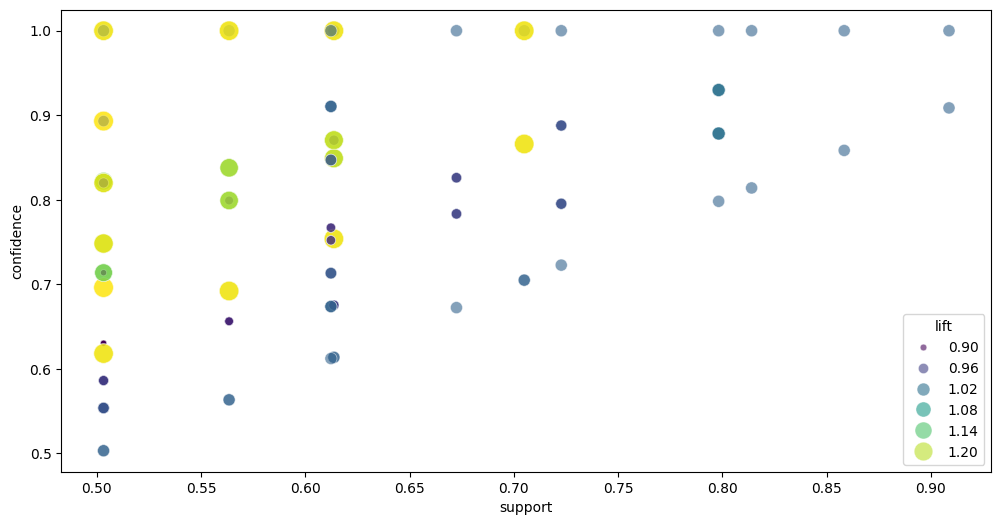

In [24]:
# إعداد البيانات للرسم
plt.figure(figsize=(12, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='viridis', alpha=0.6)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


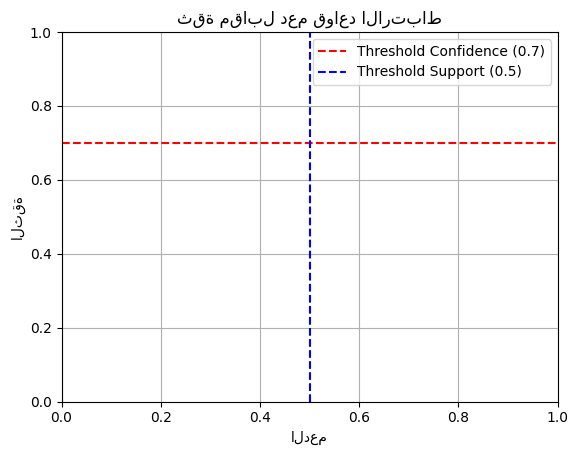

In [25]:
# الثقة مقابل الدعم

# تخصيص الرسم
plt.title('ثقة مقابل دعم قواعد الارتباط')
plt.xlabel('الدعم')
plt.ylabel('الثقة')
plt.axhline(0.7, color='red', linestyle='--', label='Threshold Confidence (0.7)')
plt.axvline(0.5, color='blue', linestyle='--', label='Threshold Support (0.5)')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


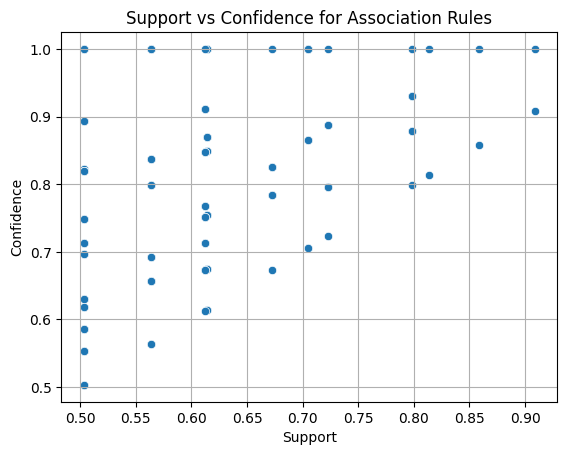

In [26]:

# رسم الدعم مقابل الثقة
sns.scatterplot(x='support', y='confidence', data=rules)

# إضافة عنوان ووسوم المحاور
plt.title('Support vs Confidence for Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')

# عرض الرسم
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


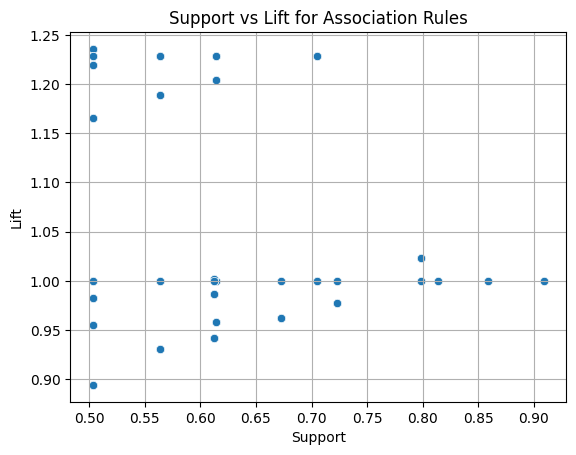

In [27]:
# رسم الدعم مقابل الرفع
sns.scatterplot(x='support', y='lift', data=rules)

# إضافة عنوان ووسوم المحاور
plt.title('Support vs Lift for Association Rules')
plt.xlabel('Support')
plt.ylabel('Lift')

# عرض الرسم
plt.grid()
plt.show()